# Цель лабораторной работы
Изучение различных методов визуализация данных.

# Задание

Выбрать набор данных (датасет). 

Провести анализ датасета:
- Проанализировать основные характеристики датасета.
- Провести визуальное исследование датасета.
- Проанализировать информацию о корреляции признаков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('nyc-jobs.csv')
data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-03-19T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-03-19T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-03-19T00:00:00.000


In [3]:
data.shape

(3843, 28)

In [4]:
data.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [5]:
data.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Contact              float64
Residency Requirement             object
Posting Date    

In [6]:
for col in data.columns:
    print('{} - {}'.format(
        col,
        data[data[col].isnull()].shape[0]
    ))

Job ID - 0
Agency - 0
Posting Type - 0
# Of Positions - 0
Business Title - 0
Civil Service Title - 0
Title Code No - 0
Level - 0
Job Category - 2
Full-Time/Part-Time indicator - 301
Salary Range From - 0
Salary Range To - 0
Salary Frequency - 0
Work Location - 0
Division/Work Unit - 0
Job Description - 3825
Minimum Qual Requirements - 3825
Preferred Skills - 3831
Additional Information - 3834
To Apply - 3827
Hours/Shift - 3840
Work Location 1 - 3840
Recruitment Contact - 3843
Residency Requirement - 3825
Posting Date - 0
Post Until - 2490
Posting Updated - 0
Process Date - 0


In [7]:
data.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3843.000000,3843.000000,3843.000000,3843.000000,0.0
mean,361000.699193,2.501952,53066.349825,76635.629377,NaN
std,40501.983335,9.978539,28759.609269,44939.671690,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,361598.000000,1.000000,43305.500000,54879.000000,NaN
50%,376977.000000,1.000000,55416.000000,75651.000000,NaN
75%,383074.000000,1.000000,69940.000000,100613.000000,NaN
max,387318.000000,271.000000,209585.000000,230000.000000,NaN


## Визуальное исследование датасета

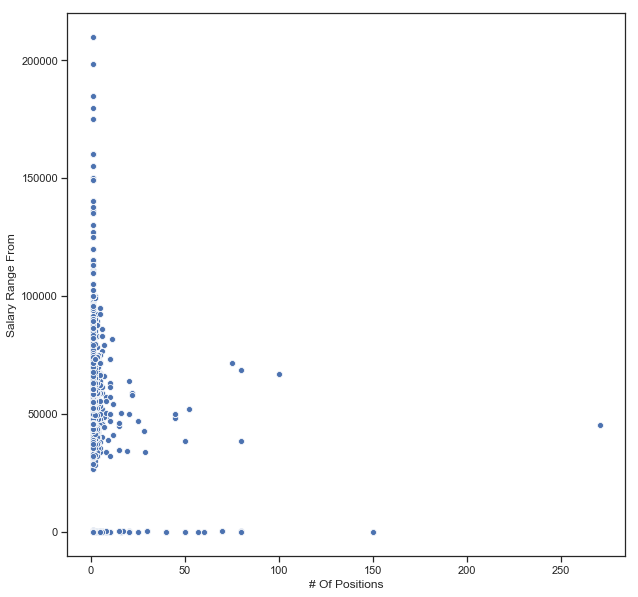

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='# Of Positions', y='Salary Range From', data=data)

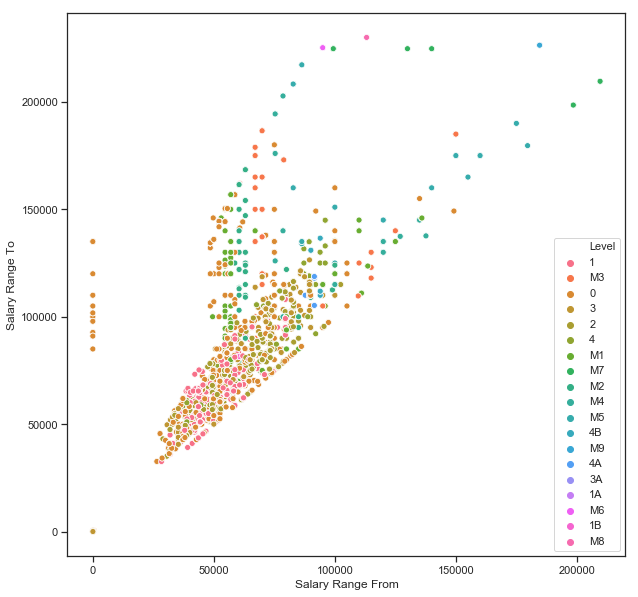

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, hue='Level', x='Salary Range From', y='Salary Range To', data=data)

**Вывод:** очевидно, что зарплатный минимум и максимум линейно зависимы

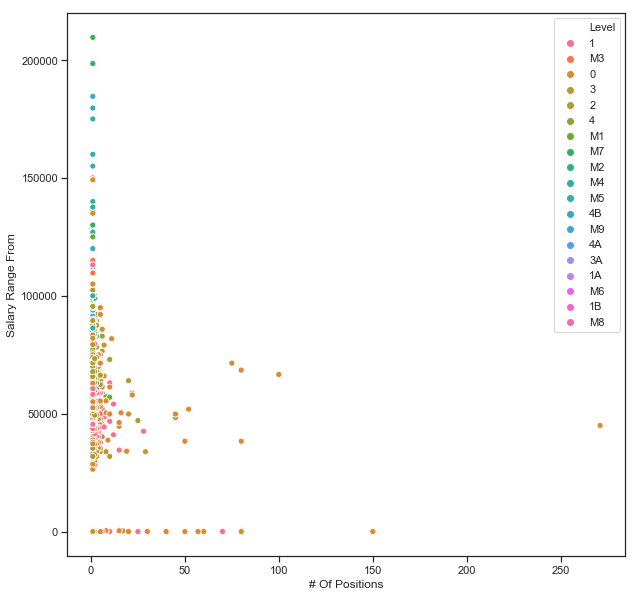

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='# Of Positions', hue='Level', y='Salary Range From', data=data)

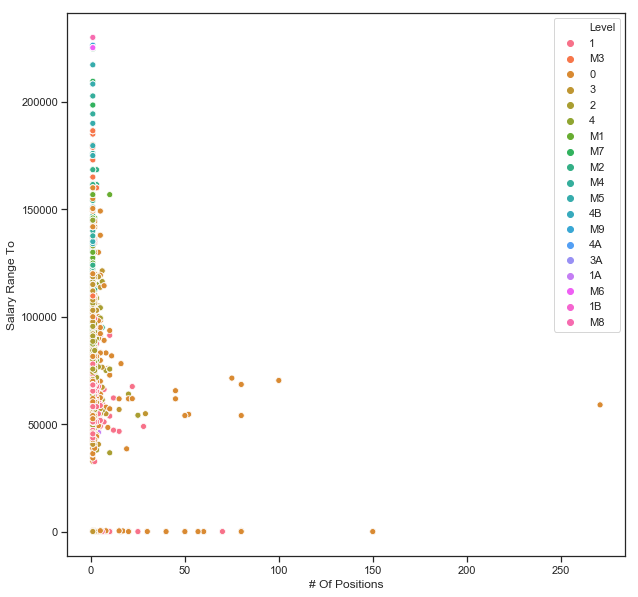

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='# Of Positions', hue='Level', y='Salary Range To', data=data)

**Вывод:** Количество вакансий для текущей минимальной зарплаты обратно пропорционально размеру этой минимальной зарплаты.

Также можно заметить, что на некоторых промежутках ЗП преобладают отдельные уровни вакансий

## Гистограмма

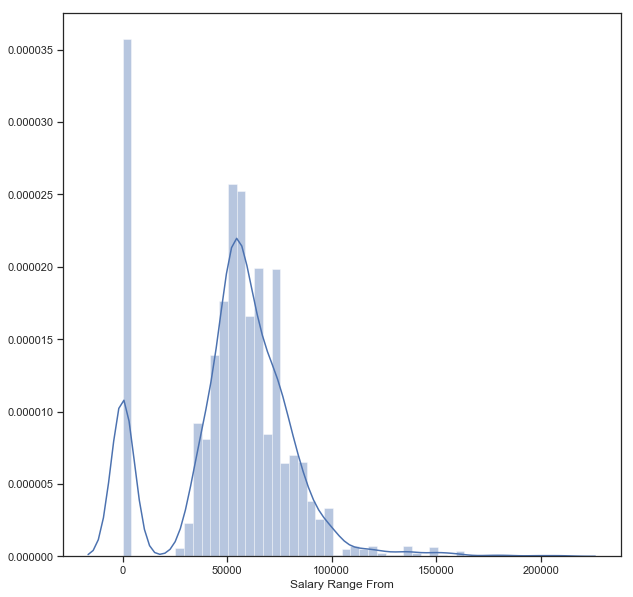

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Salary Range From'])

**Распределение частоты минимальных зарплат**

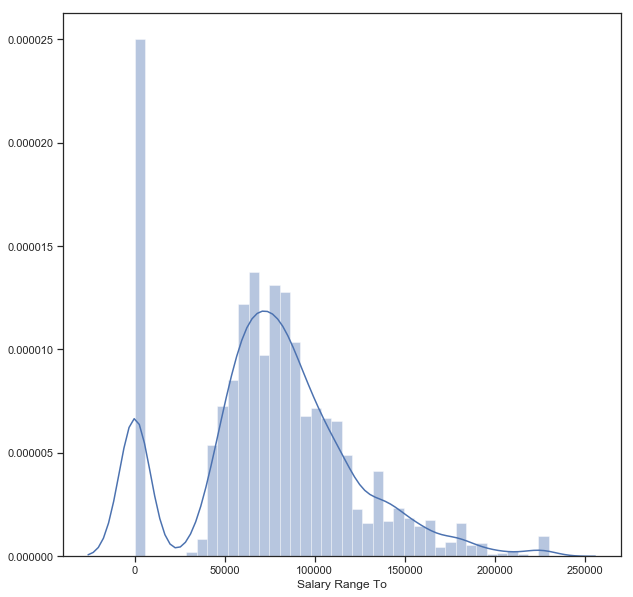

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Salary Range To'])

**Распределение частоты минимальных зарплат**

## Jointplot

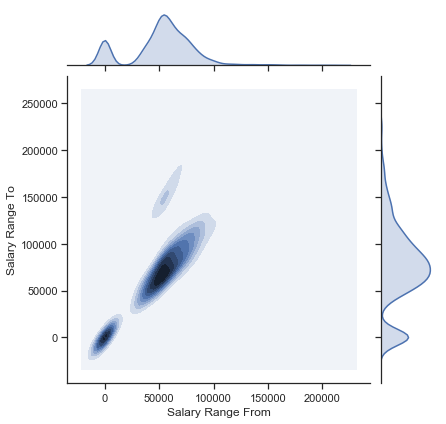

In [14]:
sns.jointplot(x='Salary Range From', y='Salary Range To', data=data, kind='kde')

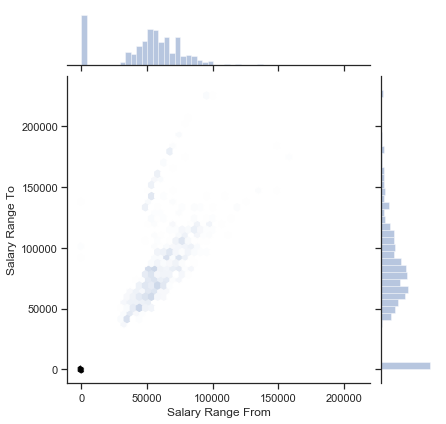

In [15]:
sns.jointplot(x='Salary Range From', y='Salary Range To', data=data, kind='hex')

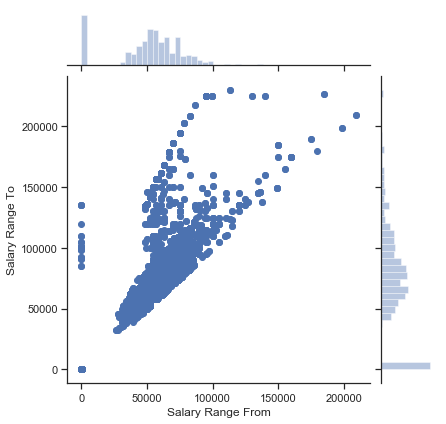

In [16]:
sns.jointplot(x='Salary Range From', y='Salary Range To', data=data)

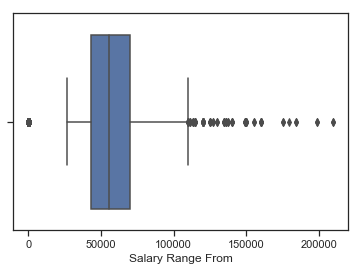

In [17]:
sns.boxplot(x=data['Salary Range From'])

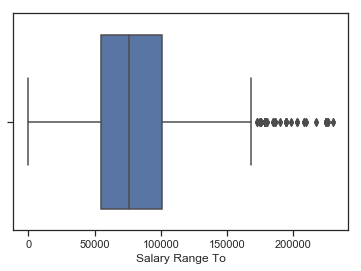

In [18]:
sns.boxplot(x=data['Salary Range To'])

In [19]:
data = data.dropna(subset=['Salary Range To', 'Salary Range From'])
data = data.drop(data[data['Salary Range To'] < 100].index)
data = data.drop(data[data['Salary Range From'] < 100].index)

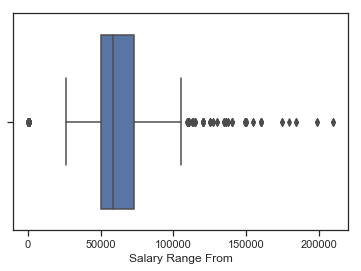

In [20]:
sns.boxplot(x=data['Salary Range From'])

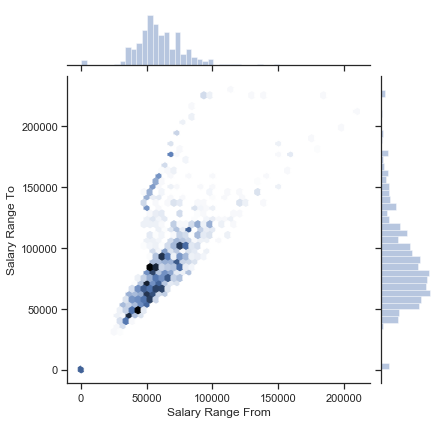

In [21]:
sns.jointplot(x='Salary Range From', y='Salary Range To', data=data, kind='hex')

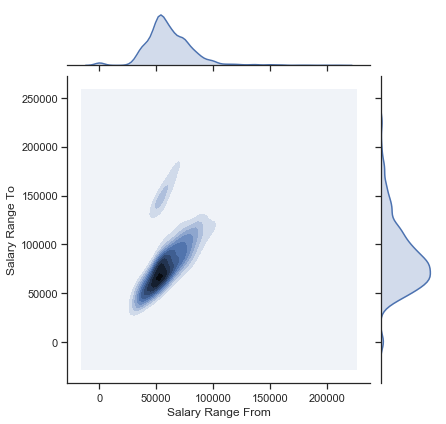

In [22]:
sns.jointplot(x='Salary Range From', y='Salary Range To', data=data, kind='kde')

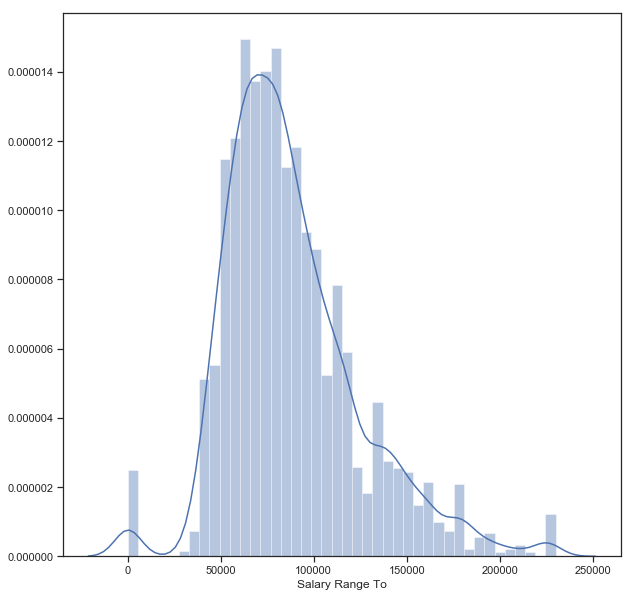

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Salary Range To'])

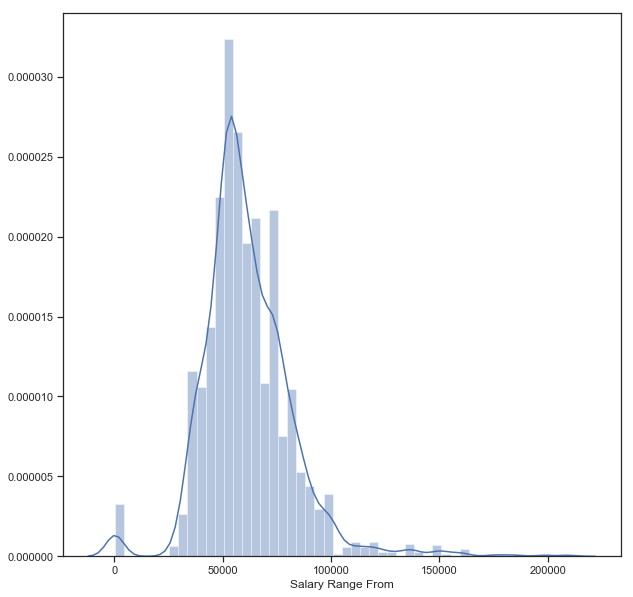

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Salary Range From'])

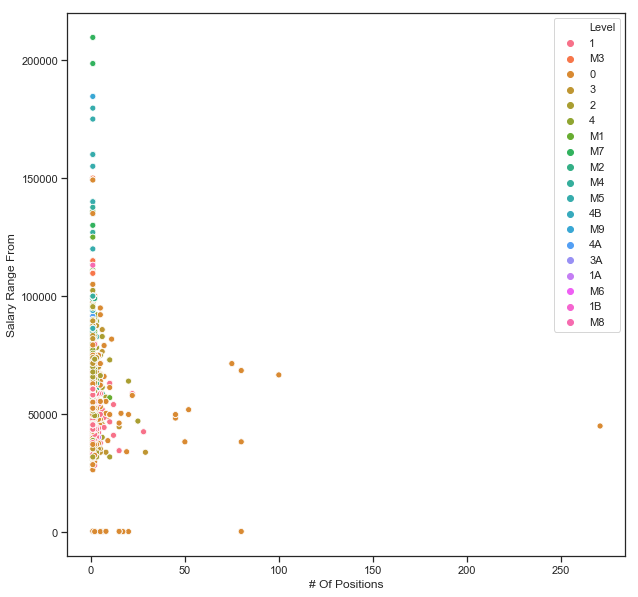

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='# Of Positions', hue='Level', y='Salary Range From', data=data)

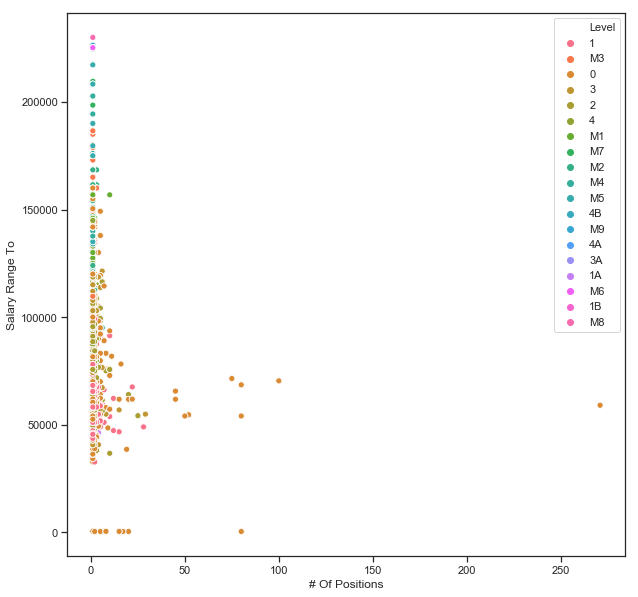

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='# Of Positions', hue='Level', y='Salary Range To', data=data)

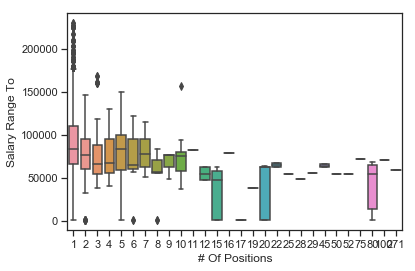

In [27]:
sns.boxplot(x='# Of Positions', y='Salary Range To', data=data)

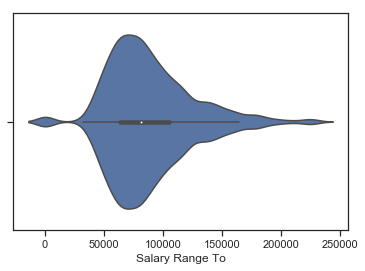

In [28]:
sns.violinplot(x=data['Salary Range To'])

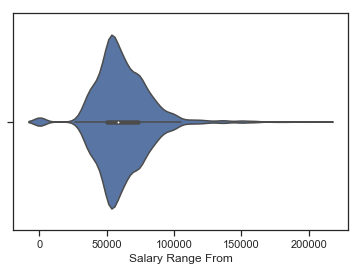

In [29]:
sns.violinplot(x=data['Salary Range From'])

## Информация о корреляции признаков

In [30]:
data.corr()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
Job ID,1.000000,-0.021967,0.023212,-0.054391,NaN
# Of Positions,-0.021967,1.000000,-0.075765,-0.092049,NaN
Salary Range From,0.023212,-0.075765,1.000000,0.669167,NaN
Salary Range To,-0.054391,-0.092049,0.669167,1.000000,NaN
Recruitment Contact,NaN,NaN,NaN,NaN,NaN


In [31]:
data.corr(method='pearson')

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
Job ID,1.000000,-0.021967,0.023212,-0.054391,NaN
# Of Positions,-0.021967,1.000000,-0.075765,-0.092049,NaN
Salary Range From,0.023212,-0.075765,1.000000,0.669167,NaN
Salary Range To,-0.054391,-0.092049,0.669167,1.000000,NaN
Recruitment Contact,NaN,NaN,NaN,NaN,NaN


In [32]:
data.corr(method='kendall')

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
Job ID,1.000000,-0.064172,0.004936,-0.065312,NaN
# Of Positions,-0.064172,1.000000,-0.116245,-0.139399,NaN
Salary Range From,0.004936,-0.116245,1.000000,0.585634,NaN
Salary Range To,-0.065312,-0.139399,0.585634,1.000000,NaN
Recruitment Contact,NaN,NaN,NaN,NaN,NaN


In [33]:

data.corr(method='spearman')

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
Job ID,1.000000,-0.081377,0.007250,-0.097995,NaN
# Of Positions,-0.081377,1.000000,-0.145899,-0.175435,NaN
Salary Range From,0.007250,-0.145899,1.000000,0.750477,NaN
Salary Range To,-0.097995,-0.175435,0.750477,1.000000,NaN
Recruitment Contact,NaN,NaN,NaN,NaN,NaN


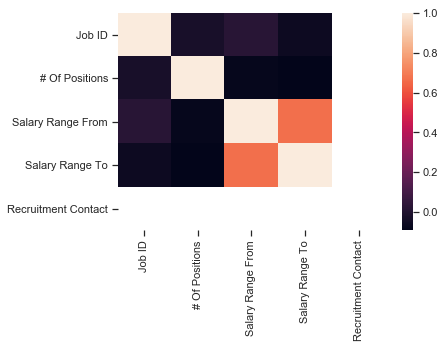

In [34]:
sns.heatmap(data.corr())

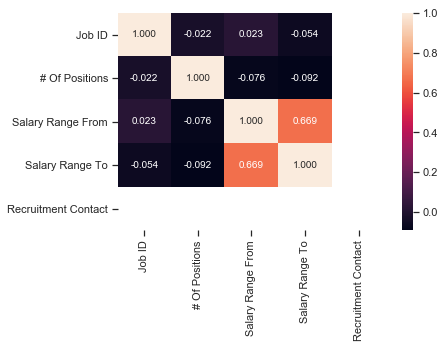

In [35]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')